# Linear Regression with Python-Scikit Learn

Author - Prabhjot Singh Bedi


In [6]:
#import the required libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [8]:
url='https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
data=pd.read_csv(url)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


<b> Plot The Data

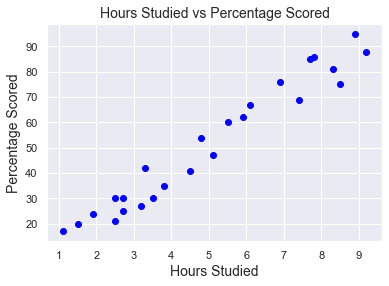

In [9]:
plt.scatter(data['Hours'],data['Scores'],c='blue')
plt.title('Hours Studied vs Percentage Scored',fontsize=14)
plt.xlabel('Hours Studied',fontsize=14)
plt.ylabel('Percentage Scored',fontsize=14)
plt.show()

Here it is observed that the graph is linear so linear regression is used

<b> Preparing The Data

In [10]:
x = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

<b> Split The Dataset

In [11]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=365)

<b> Training The Data

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
reg.coef_

array([9.95760312])

In [15]:
reg.intercept_

1.4208877598311105

<b>Plot the predicted value against training dataset

In [16]:
line = reg.coef_*X_train+reg.intercept_

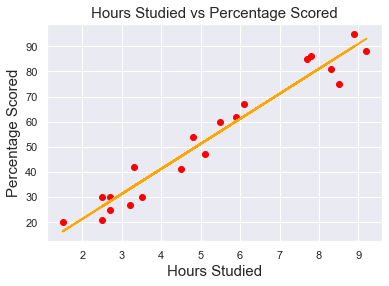

In [17]:
plt.scatter(X_train,y_train,c='red')
plt.plot(X_train,line,c='orange',lw=2)
plt.title('Hours Studied vs Percentage Scored',fontsize=15)
plt.xlabel('Hours Studied',fontsize=15)
plt.ylabel('Percentage Scored',fontsize=15)
plt.show()

<b> Predictions

In [18]:
y_pred=reg.predict(X_test)

In [19]:
tested_data = pd.DataFrame(y_pred,columns=['Predictions'])  
tested_data['Actual']=y_test
tested_data

,Predictions,Actual
0,39.259780,35
1,20.340334,24
2,70.128349,76
3,75.107151,69
4,12.374251,17


<b> Plot The Predicted Values

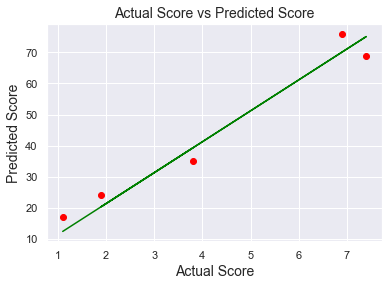

In [20]:
plt.scatter(X_test,y_test,c='red')
plt.plot(X_test,y_pred,c='green')
plt.title('Actual Score vs Predicted Score',fontsize=14)
plt.xlabel('Actual Score',fontsize=14)
plt.ylabel('Predicted Score',fontsize=14)
plt.show()


<b> What will be predicted score if a student studies for 9.25 hrs/ day?

In [21]:
hours = np.array(9.25).reshape(-1,1)
value = reg.predict(hours)
print("No of Hours studied= ",hours)
print("Predicted Score = ",value)

No of Hours studied=  [[9.25]]
Predicted Score =  [93.52871659]


<b>Evaluating the model

The final step is to evaluate the performance of algorithm

In [22]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.904799258483659
